In [188]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
red = pd.read_csv('winequality-red.csv', delimiter=";")
white = pd.read_csv('winequality-white.csv', delimiter=";")

wine_og = pd.concat([red, white], ignore_index=True) 

red['type'] = 1
white['type'] = 0
wine = pd.concat([red, white], ignore_index=True) 

In [3]:
#should i make a column with red or white indicators?


In [193]:
print(wine.columns)
print(wine_og.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [41]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [196]:
wine['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

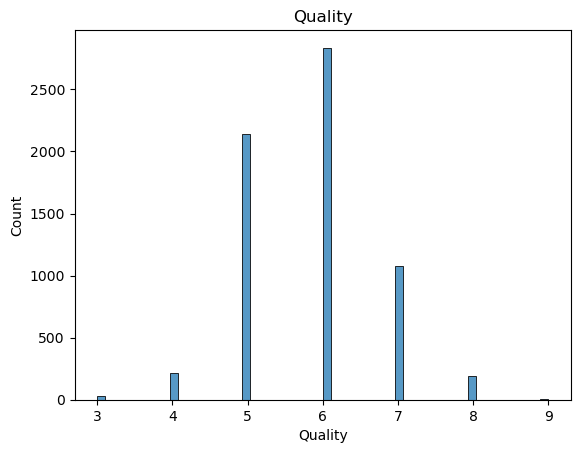

In [197]:
sns.histplot(wine["quality"], kde=False)
plt.title("Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

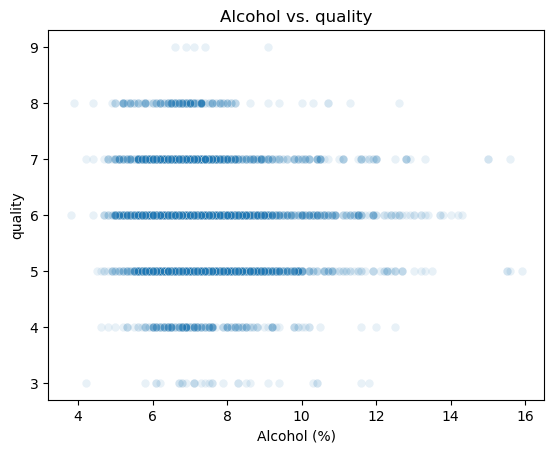

In [199]:
sns.scatterplot(data=wine, x="fixed acidity", y="quality", alpha=0.1)
plt.title("Alcohol vs. quality")
plt.xlabel("Alcohol (%)")
plt.ylabel("quality")
plt.show()

In [14]:
#add a data pipeline here to make it easier to edit desired features

In [201]:
#next, try different values of n and different features to find the most relevant hyperparameters
print(wine.shape)


(6497, 13)


In [202]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import random
from matplotlib.image import imread
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from PIL import Image

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [214]:
# ANN Basline
train, test = train_test_split(wine_og, shuffle=True, test_size=0.2, random_state=1)

# Verify lengths of test and train against expected
print(len(test))
print(len(train))

x_train, y_train = train.drop(["quality"], axis=1), train["quality"]
x_test, y_test = test.drop(["quality"], axis=1), test["quality"]

# Random seeds
np.random.seed(2)
tf.random.set_seed(2)

# One hot encode the y variable
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

# print(y_train_dummies[0:10])

# Define NN
model = Sequential()
model.add(Dense(10,input_dim=len(x_train.columns), activation='relu')) # First layer defines input_dim
# model.add(Dense(81, activation='relu', kernel_regularizer=l1(0.01))) 
model.add(Dense(80, activation='relu')) 
# model.add(Dense(27, activation='relu')) 
model.add(Dense(len(y_train_dummies.columns), activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


from sklearn.metrics import classification_report

# Fit and predict with NN
model.fit(x_train, y_train_dummies, epochs=120, batch_size=30, verbose=0, validation_split=0.2)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

# Convert probabilities to categorical predictions
yhat_train = np.argmax(yhat_train, axis=1) + 3
yhat_test = np.argmax(yhat_test, axis=1) + 3

# Get metrics
print('Accuracy on training set: %.2f' % accuracy_score(y_train, yhat_train))
print('Accuracy on test set: %.2f' % accuracy_score(y_test, yhat_test))
print(classification_report(y_test, yhat_test))


1300
5197
41/41 [==============================] - 0s 449us/step
Accuracy on training set: 0.55
Accuracy on test set: 0.53
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.17      0.02      0.04        48
           5       0.55      0.64      0.59       435
           6       0.54      0.58      0.56       577
           7       0.44      0.35      0.39       203
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.24      0.23      0.23      1300
weighted avg       0.50      0.53      0.51      1300



/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [222]:
# ANN with pre-processing
train, test = train_test_split(wine, shuffle=True, test_size=0.2, random_state=1)

# Verify lengths of test and train against expected
print(len(test))
print(len(train))

x_train, y_train = train.drop(["quality"], axis=1), train["quality"]
x_test, y_test = test.drop(["quality"], axis=1), test["quality"]

# Standardization
mean_pixel = np.mean(x_train, axis=0)
std_pixel = np.std(x_train, axis=0) + 0.000000001
x_train_scaled = (x_train - mean_pixel)/std_pixel
x_test_scaled = (x_test - mean_pixel)/std_pixel

from tensorflow.keras.regularizers import l1, l2

# Random seeds
np.random.seed(2)
tf.random.set_seed(2)

# One hot encode the y variable
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)


# Define NN
model = Sequential()
model.add(Dense(10,input_dim=len(x_train.columns), activation='relu')) # First layer defines input_dim
model.add(Dense(80, activation='relu', kernel_regularizer=l1(0.01))) 
# model.add(Dense(27, activation='relu')) 
model.add(Dense(len(y_train_dummies.columns), activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Fit and predict with NN
model.fit(x_train, y_train_dummies, epochs=120, batch_size=30, verbose=0, validation_split=0.2)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

# Convert probabilities to categorical predictions
yhat_train = np.argmax(yhat_train, axis=1) + 3
yhat_test = np.argmax(yhat_test, axis=1) + 3

# Get metrics
print('Accuracy on training set: %.2f' % accuracy_score(y_train, yhat_train))
print('Accuracy on test set: %.2f' % accuracy_score(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

1300
5197
41/41 [==============================] - 0s 433us/step
Accuracy on training set: 0.54
Accuracy on test set: 0.53
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.02      0.04        48
           5       0.61      0.50      0.55       435
           6       0.52      0.67      0.58       577
           7       0.42      0.39      0.41       203
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.36      0.23      0.23      1300
weighted avg       0.53      0.53      0.51      1300



/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [227]:
print(len(yhat_train))
print(len(y_test))
print(len(yhat_test))

print(type(model))

5197
1300
1300
<class 'keras.engine.sequential.Sequential'>


In [229]:
from keras.wrappers.scikit_learn import KerasClassifier

# define the wrapper function for the Keras model
def create_model(num_hidden_layers, hidden_layer_size=10, activation='relu', optimizer='adam', alpha=0.0001):
    
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_scaled.shape[1], activation=activation, kernel_regularizer='l2', bias_regularizer='l2'))
    
    for i in range(num_hidden_layers-1):
        model.add(Dense(hidden_layer_size))

    model.add(Dense(y_train_dummies.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

# create the KerasClassifier using the wrapper function
keras_model = KerasClassifier(build_fn=create_model, verbose=0)
print(keras_model.get_params())

{'verbose': 0, 'build_fn': <function create_model at 0x7f79138c4820>}


/var/folders/br/99fxg1js21j22lt9jfrpcm2c0000gn/T/ipykernel_24428/1888117566.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, verbose=0)


In [230]:
# Estimated using RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Define the parameter grid for RandomSearchCV
param_grid_rand = {
    'num_hidden_layers': randint(1, 4),
    'hidden_layer_size': randint(1,128),
    'activation': ['relu'],
    'optimizer': ['adam'],
    # 'optimizer': ['adam', 'sgd'],
    # 'alpha': [0.0001, 0.001, 0.01],
    'alpha': [0.001],
    'batch_size': randint(32,128),
    'epochs': randint(100,150)
    # 'batch_size': [16, 32, 64],
    # 'epochs': [50, 100, 150]
}   

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(keras_model,
    param_distributions=param_grid_rand, 
    n_iter=20, 
    scoring='accuracy', 
    cv=3, 
    verbose=1, 
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print('Best Hyperparameters:', random_search.best_params_)

print('Best Training Accuracy:', random_search.best_score_)

# Evaluate the performance of the best model on the testing data
best_model_random = random_search.best_estimator_

test_preds = best_model_random.predict(x_test_scaled)
train_preds = best_model_random.predict(x_train_scaled)


# Get metrics
print('Accuracy on training set: %.2f' % accuracy_score(y_train, train_preds))
print('Accuracy on test set: %.2f' % accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
55/55 [==============================] - 0s 526us/step
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 40, 'epochs': 111, 'hidden_layer_size': 42, 'num_hidden_layers': 3, 'optimizer': 'adam'}
Best Training Accuracy: 0.5614752259605795
163/163 [==============================] - 0s 446us/step
Accuracy on training set: 0.57
Accuracy on test set: 0.58
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.30      0.06      0.10        48
           5       0.64      0.63      0.64       435
           6       0.56      0.71      0.63       577
           7       0.51      0.31      0.38       203
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.29      0.24      0.25      1300
weighted avg       0

/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [231]:
# Further tuned using GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'num_hidden_layers': [2,3,4],
    'hidden_layer_size': [40,60,80],
    'activation': ['relu'],
    'optimizer': ['adam'],
    # 'optimizer': ['adam', 'sgd'],
    # 'alpha': [0.0001, 0.001, 0.01],
    'alpha': [0.001],
    'batch_size': [40,60],
    'epochs': [135]
    # 'batch_size': [16, 32, 64],
    # 'epochs': [50, 100, 150]
}   

from sklearn.model_selection import GridSearchCV


# Create GridSearchCV object
grid_search = GridSearchCV(keras_model, param_grid=param_grid, cv=5, scoring='accuracy')

print('where are we?')

# Fit the GridSearchCV object to the training data
# grid_search.fit(x_train_scaled, y_train)
grid_search.fit(x_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance of the best model on the testing data
best_model = grid_search.best_estimator_

test_preds = best_model.predict(x_test_scaled)
train_preds = best_model.predict(x_train_scaled)

test_score = best_model.score(x_test_scaled, y_test)
print("Test accuracy: ", test_score)


test_preds = best_model.predict(x_test_scaled)
train_preds = best_model.predict(x_train_scaled)


# Get metrics
print('Accuracy on training set: %.2f' % accuracy_score(y_train, train_preds))
print('Accuracy on test set: %.2f' % accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

where are we?
33/33 [==============================] - 0s 525us/step
Best hyperparameters:  {'activation': 'relu', 'alpha': 0.001, 'batch_size': 60, 'epochs': 135, 'hidden_layer_size': 80, 'num_hidden_layers': 2, 'optimizer': 'adam'}
163/163 [==============================] - 0s 454us/step
Test accuracy:  0.5746153593063354
163/163 [==============================] - 0s 467us/step
Accuracy on training set: 0.58
Accuracy on test set: 0.57
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.04      0.07        48
           5       0.64      0.62      0.63       435
           6       0.56      0.69      0.62       577
           7       0.50      0.37      0.43       203
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.27      0.25      0.25      1300
weighted avg     

/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanay/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [161]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)



<bound method NDFrame.head of 0       6
1       5
2       6
3       5
4       5
       ..
3241    8
3242    8
3243    8
3244    8
3245    8
Name: quality, Length: 3246, dtype: int64>


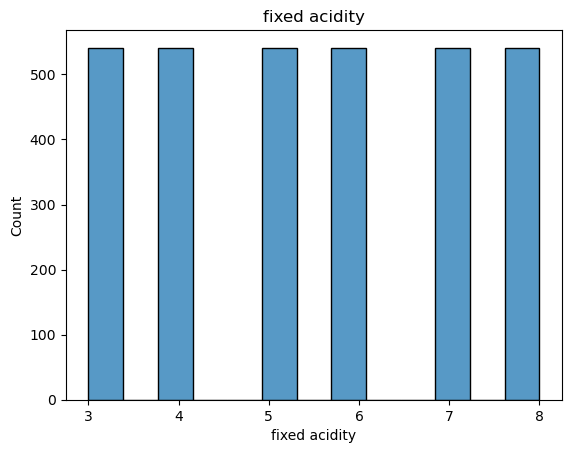

/var/folders/br/99fxg1js21j22lt9jfrpcm2c0000gn/T/ipykernel_24428/3871031772.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model_rand = KerasClassifier(build_fn=create_model_rand, verbose=0)


<class 'pandas.core.frame.DataFrame'>
Fitting 3 folds for each of 15 candidates, totalling 45 fits
34/34 [==============================] - 0s 782us/step
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 109, 'epochs': 115, 'hidden_layer_size': 107, 'num_hidden_layers': 4, 'optimizer': 'adam'}
Best Accuracy: 0.674060382008626
Test accuracy:  0.6031249761581421
10/10 [==============================] - 0s 978us/step
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.63      0.73      0.68       140
           6       0.64      0.54      0.59       134
           7       0.53      0.57      0.55        30
           8       0.33      0.50      0.40         2

    accuracy                           0.60       320
   macro avg       0.36      0.39      0.37       320
weighted avg       0.60      0.60      0.60       320



In [187]:
print(y_train_smote.head)

sns.histplot(y_train_smote, kde=False)
plt.title("fixed acidity")
plt.xlabel("fixed acidity")
plt.ylabel("Count")
plt.show()

# define the wrapper function for the Keras model
def create_model_rand(num_hidden_layers, hidden_layer_size=80, activation='relu', optimizer='adam', alpha=0.0001):
    
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=x_train_smote.shape[1], activation=activation, kernel_regularizer='l2', bias_regularizer='l2'))
    
    for i in range(num_hidden_layers-1):
        model.add(Dense(hidden_layer_size))

    model.add(Dense(y_train_dummies.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

# create the KerasClassifier using the wrapper function
keras_model_rand = KerasClassifier(build_fn=create_model_rand, verbose=0)

# Define the parameter grid for GridSearchCV
param_grid_rand = {
    'num_hidden_layers': randint(1, 5),
    'hidden_layer_size': randint(40,120),
    'activation': ['relu'],
    'optimizer': ['adam'],
    # 'optimizer': ['adam', 'sgd'],
    # 'alpha': [0.0001, 0.001, 0.01],
    'alpha': [0.001],
    'batch_size': randint(32,128),
    'epochs': randint(50,150)
    # 'batch_size': [16, 32, 64],
    # 'epochs': [50, 100, 150]
}   

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(keras_model_rand,
    param_distributions=param_grid_rand, 
    n_iter=15, 
    scoring='accuracy', 
    cv=3, 
    verbose=1, 
    n_jobs=-1
)

print(type(x_train_smote))

random_search.fit(x_train_smote, y_train_smote)

# Print the best hyperparameters and their corresponding accuracy score
print('Best Hyperparameters:', random_search.best_params_)

print('Best Accuracy:', random_search.best_score_)

best_model = random_search.best_estimator_

test_score = best_model.score(x_test_scaled, y_test)
print("Test accuracy: ", test_score)

y_pred = best_model.predict(x_test_scaled)
print(classification_report(y_test, y_pred))
